In [3]:
# imports
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

from transformers import AutoImageProcessor, AutoModelForImageClassification
from gradcam import GradCAM

In [10]:
# load model
model_name = "apple/mobilevitv2-1.0-imagenet1k-256"
processor = AutoImageProcessor.from_pretrained(model_name, use_fast=True)
model = AutoModelForImageClassification.from_pretrained(model_name)

Importing dog.jpg as a test

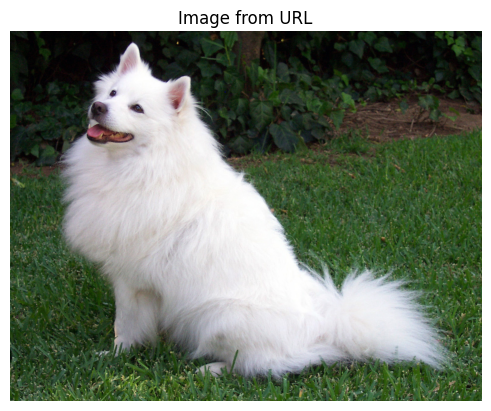

In [5]:
image_url = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"

try:
  response = requests.get(image_url)
  response.raise_for_status()
  
  image_data = BytesIO(response.content)
  img = Image.open(image_data)
  
  plt.imshow(img)
  plt.axis('off')
  plt.title('Image from URL')
  plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
except IOError as e:
    print(f"Error opening image with PIL: {e}")

Preprocess the image

In [17]:
img_processed = processor(img, return_tensors="pt")
inputs = img_processed['pixel_values'].to(model.device)

print(inputs.shape)

torch.Size([1, 3, 256, 256])


Pass the image through the model and classify the image

In [33]:
outputs = model(inputs)
logits = outputs.logits
print(f"Shape of logits: {logits.shape}") 

target_idx_int = logits.argmax(dim=1).item()
print(f"Index of maximum classification: {target_idx_int}")

Shape of logits: torch.Size([1, 1000])
Index of maximum classification: 258


In [35]:
class_dict = model.config.id2label
class_readable = class_dict[target_idx_int]
print(f"Class: {class_readable}")

Class: Samoyed, Samoyede
